## Benchmarking Performance and Scaling of Python Clustering Algorithms
##### https://github.com/scikit-learn-contrib/hdbscan/blob/master/notebooks/Benchmarking%20scalability%20of%20clustering%20implementations%202D%20v0.7.ipynb

In [11]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import time

# Clustering Models
from sklearn.cluster import KMeans
from sklearn.cluster import AgglomerativeClustering
from sklearn.cluster import DBSCAN
from sklearn.cluster import SpectralClustering
from sklearn.cluster import AffinityPropagation

# Generate a random dataset
from sklearn.datasets import make_blobs

In [13]:
%matplotlib inline
sns.set_context('poster')
sns.set_palette('Paired', 10)
sns.set_color_codes()

In [15]:
import warnings
warnings.filterwarnings('ignore')

In [16]:
def benchmark_algorithm(dataset_sizes, cluster_function, function_args, function_kwds, dataset_dimension=2, max_time=45, sample_size=2):

    # Initialize the result with NaNs so that any unfilled entries
    # will be considered NULL when we convert to a pandas dataframe at the end
    result = np.nan * np.ones((len(dataset_sizes), sample_size))
    for index, size in enumerate(dataset_sizes):
        dataset_n_clusters = int(np.log2(size))
        for s in range(sample_size):
            # Use sklearns make_blobs to generate a random dataset with specified size
            # dimension and number of clusters
            data, _ = make_blobs(n_samples=size, n_features=dataset_dimension, centers=dataset_n_clusters)

            # Start the clustering with a timer
            start_time = time.time()
            cluster_function(data, *function_args, **function_kwds)
            time_taken = time.time() - start_time

            # If we are taking more than max_time then abort -- we don't
            # want to spend excessive time on slow algorithms
            if time_taken > max_time:
                result[index, s] = time_taken
                return pd.DataFrame(np.vstack([dataset_sizes.repeat(sample_size), result.flatten()]).T, columns=['x','y'])
            else:
                result[index, s] = time_taken

    # Return the result as a dataframe for easier handling with seaborn afterwards
    return pd.DataFrame(np.vstack([dataset_sizes.repeat(sample_size), result.flatten()]).T, columns=['x','y'])

In [17]:
dataset_sizes = np.hstack([np.arange(1, 6) * 500, np.arange(3,7) * 1000, np.arange(4,17) * 2000])

## Fast Clustering Algorithms

In [20]:
k_means = KMeans(10)
k_means_data = benchmark_algorithm(dataset_sizes, k_means.fit, (), {})

In [21]:
dbscan = DBSCAN(eps=1.25)
dbscan_data = benchmark_algorithm(dataset_sizes, dbscan.fit, (), {})

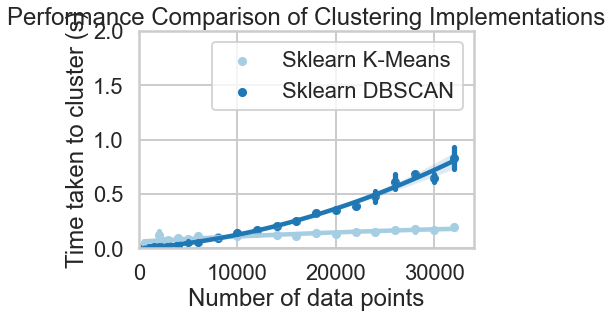

In [30]:
sns.regplot(x='x', y='y', data=k_means_data, order=2, label='Sklearn K-Means', x_estimator=np.mean)
sns.regplot(x='x', y='y', data=dbscan_data, order=2, label='Sklearn DBSCAN', x_estimator=np.mean)

plt.gca().axis([0, 34000, 0, 2])
plt.gca().set_xlabel('Number of data points')
plt.gca().set_ylabel('Time taken to cluster (s)')
plt.title('Performance Comparison of Clustering Implementations')
plt.legend()

## Slow Clustering Algorithms

In [ ]:
agglomerative = AgglomerativeClustering(10)
agg_data = benchmark_algorithm(dataset_sizes, agglomerative.fit, (), {}, sample_size=4)

In [33]:
spectral = SpectralClustering(10)
spectral_data = benchmark_algorithm(dataset_sizes, spectral.fit, (), {}, sample_size=6)

In [35]:
affinity_prop = AffinityPropagation()
ap_data = benchmark_algorithm(dataset_sizes, affinity_prop.fit, (), {}, sample_size=3)

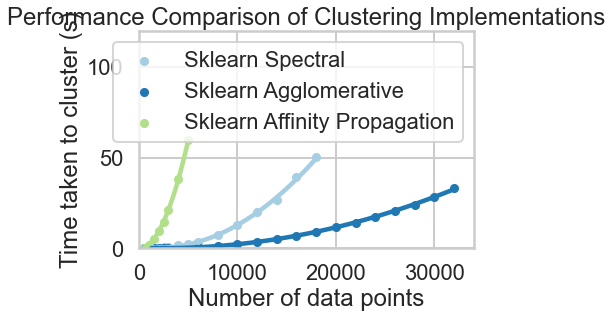

In [36]:
sns.regplot(x='x', y='y', data=spectral_data, order=2, label='Sklearn Spectral', x_estimator=np.mean)
sns.regplot(x='x', y='y', data=agg_data, order=2, label='Sklearn Agglomerative', x_estimator=np.mean)
sns.regplot(x='x', y='y', data=ap_data, order=2, label='Sklearn Affinity Propagation', x_estimator=np.mean)

plt.gca().axis([0, 34000, 0, 120])
plt.gca().set_xlabel('Number of data points')
plt.gca().set_ylabel('Time taken to cluster (s)')
plt.title('Performance Comparison of Clustering Implementations')
plt.legend()